# Dataset structure

SPEED consists of collocations of GPM PMW sensors with *reference preciptiation estimates* from multiple *reference data sources*. All collocations are provided on two grids: The native grid of the respective GPM PMW sensor and regridded to a regular lat/lon grid with a resolution of 0.036$^\circ$. These two types of collocations will be referred to as *native* and *gridded*.
 

## Organization

For a given source of reference data, here named ``reference``, the data is organized into folders as shown below.

````
reference
    ├── native
    │   ├── sensor1
    │   │   ├── reference_sensor1_YYYYMMDDHHMMSS.nc
    │   │   └── ...
    │   └── sensor2
    │       ├── reference_sensor2_YYYYMMDDHHMMSS.nc
    │       └── ...
    └── regridded
        ├── reference
        │   └── reference_YYYYMMDDHHMMSS.nc
        ├── sensor1
        │   ├── sensor1_YYYYMMDDHHMMSS.nc
        │   └── ...
        └── sensor2
            ├── sensor2_YYYYMMDDHHMMSS.nc
            └── ...
````

At the highest-level, the data is separated by reference data source. The collocations for every reference data souce are split up into a ``native`` sub-folder containing the collocations on the native grids and a ``gridded`` folder containing the gridded collocations. 
Within the ``native`` folder, collcation files are organized into different folders with respect to the sensor they are derived from (``sensor1`` and ``sensor2`` in the example).

# File content

The file structure of the native and regridded data is slightly different but they share the same variable names. Native-grid files contain both *input* and *reference* data in separate groups, whereas for the regridded data the reference data is provided as a separate file.

## Variable names

### Input data

The input data files all contain the following variables:

#### Observations

| Variable name               | Explanation                                             | Unit         |
|-----------------------------|---------------------------------------------------------|--------------|
| ``tbs_mw``                  | Microwave brightness temperatures                      | K            | 
| ``tbs_ir``                  | 11 $\mu m$ brightness temperatures                      | K            |

#### Ancillary data

| Variable name               | Explanation                                             | Unit         |
|-----------------------------|---------------------------------------------------------|--------------|
| ``earth_incidence_angle``   | Earth incidence angle                                   | Degree       |
| ``wet_bulb_temperature``    | Wet-bulb temperature                                    | K            |
| ``lapse_rate``              | Lapse rate                                              | K / km       |
| ``total_column_water_vapor``| Total-column water vapor                                | kg / m$^2$   |
| ``surface_temperature``     | Surface temperature                                     | K            |
| ``two_meter_temperature``   | Two-meter temperature                                   | K            |
| ``convective_precipitation``| ERA5 convective precipitation                           | mm / h       |
|  ``moisture_convergence``   | ERA5 moisture convergence                               | kg / m$^2$   |
| ``leaf_area_index``         | Leaf-area index                                         | m$^2$ / m$^2$|
| ``snow_depth``              | Snow depth                                              | mm           |
| ``orographic_wind``         | ERA5 orographic wind                                    | m / s        |
| ``10m_wind``                | ERA5 10-m wind                                          | m / s        |
| ``mountain_type``           | Mountain type                                           |  ---         |
| ``land_fraction``           | Land fraction                                           | %            |
|  ``ice_fraction``           | Ice fraction                                            | %            |
| ``l1c_quality_flag``        | GPM L1C quality flag                                    |    ---       |
| ``sunglint_angle``          | Sunglint angle                                          | Degree       |
| ``surface_type``            | CSU surface type                                        | ---          |
| ``airlifting_index``        | Airlifting index                                        | ---          |

### Geolocation and time

| Variable name               | Explanation                                             | Unit         |
|-----------------------------|---------------------------------------------------------|--------------|
| ``latitude``*               | Latitude                                                | Degree N     |
| ``longitude``*              | Longitude                                               | Degree E     |
| ``scan_time``*              | Time stamp marking the start of the scan line           | ---          |

## Native grids


## Input data

## Reference data

| Variable name               | Explanation                                             | Unit         |
|-----------------------------|---------------------------------------------------------|--------------|
| ``surface_precip``          | Ground-truth surface precipitation                      | mm/h         | 
| ``surface_precip_cmb``      | Surface precip from GPM CMB                             | mm/h         |
| ``surface_precip_mirs``     | Surface precip from MIRS                                | mm/h         |

| **Note**: Not all reference data variables are present in all files. The ``surface_precip_cmb`` and ``surface_precip_mirs``
| fields, for example, are only present in reference data derived from GPM CMB. The ``precip_type`` and ``radar_quality_index``
| field, on the other hand, are present only in files derived from MRMS.

## Collocation example

### MRMS

The figure below shows an example collocation of MHS PMW observations and MRMS reference precipitation esimates. Panels (a) and (b) show the data in native format, while panel (c) and (d) display the data in regridded format.

In [33]:
%load_ext autoreload
%autoreload 2
import numpy as np
from speed.plotting import (
    plot_collocations_native,
    plot_collocations_gridded
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
print(str(files[ind]).replace("native", "gridded"))

/xdata/simon/speed/mrms/mhs/gridded/mrms_mhs_20190101133421.nc


array([<Axes: ylabel='Brightness temperatures [K]'>, <GeoAxes: >,
       <GeoAxes: >, <GeoAxes: >,
       <Axes: ylabel='Surface precipitation [mm h$^{-1}$]'>], dtype=object)

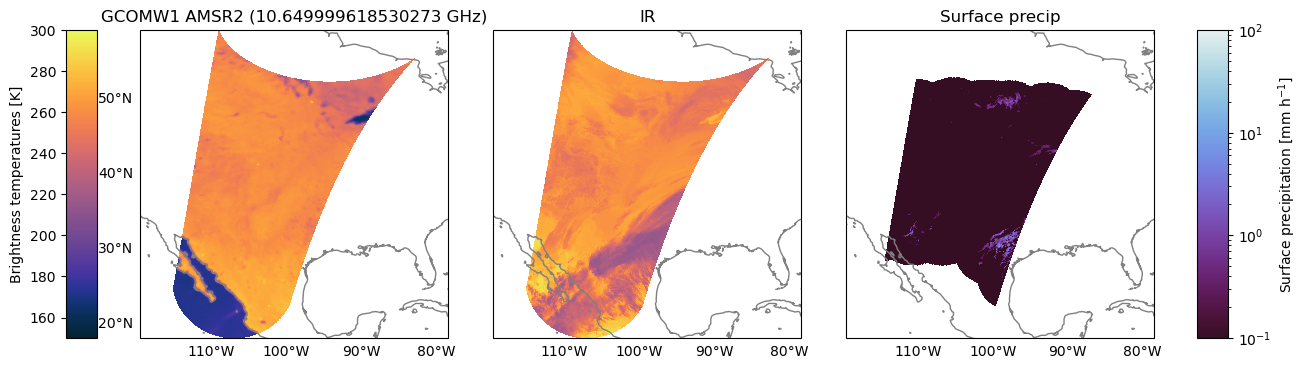

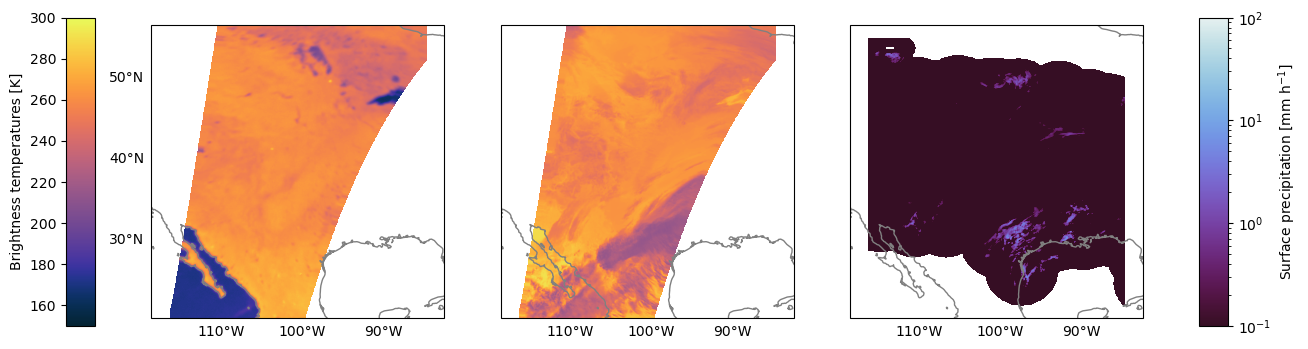

In [38]:
from pathlib import Path
ind = 2
files = sorted(list(Path("/xdata/simon/speed/mrms/amsr2/native/").glob("*.nc")))
files = [path for path in files if Path(str(path).replace("native", "gridded")).exists()]
plot_collocations_native(files[ind])
plot_collocations_gridded(str(files[ind]).replace("native", "gridded"));

In [39]:
from speed.grids import GLOBAL
lons, lats = GLOBAL.grid.get_lonlats()

In [40]:
ir_data = xr.load_dataset("/xdata/simon/speed/raw/gpm/merged_ir/merg_2018123122_4km-pixel.nc4")

In [53]:
lons.shape, ir_data.lon.shape, ir_data.lat.shape

((3298, 9896), (9896,), (3298,))

In [48]:
np.abs(ir_data.lon.data - lons).max() / 0.036 

0.0005461804946094162

array([<Axes: ylabel='Brightness temperatures [K]'>, <GeoAxes: >,
       <GeoAxes: >, <GeoAxes: >,
       <Axes: ylabel='Surface precipitation [mm h$^{-1}$]'>], dtype=object)

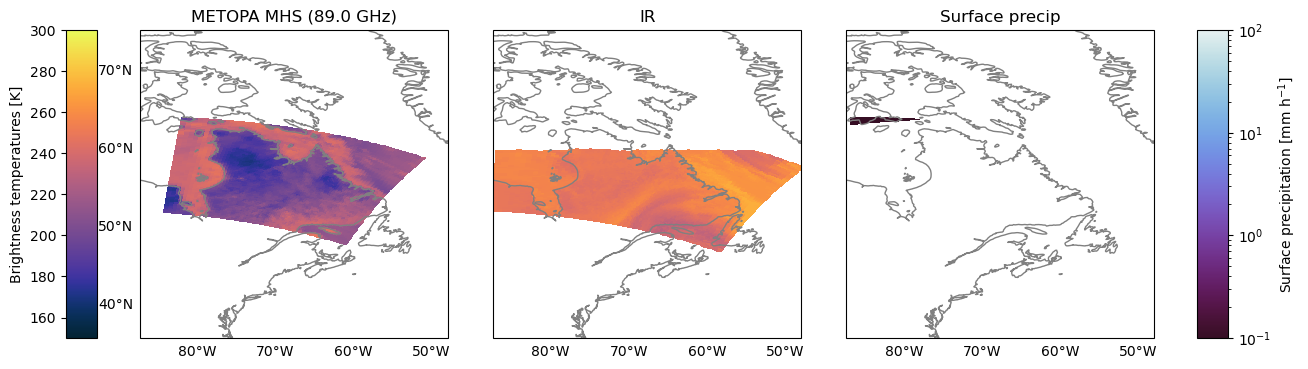

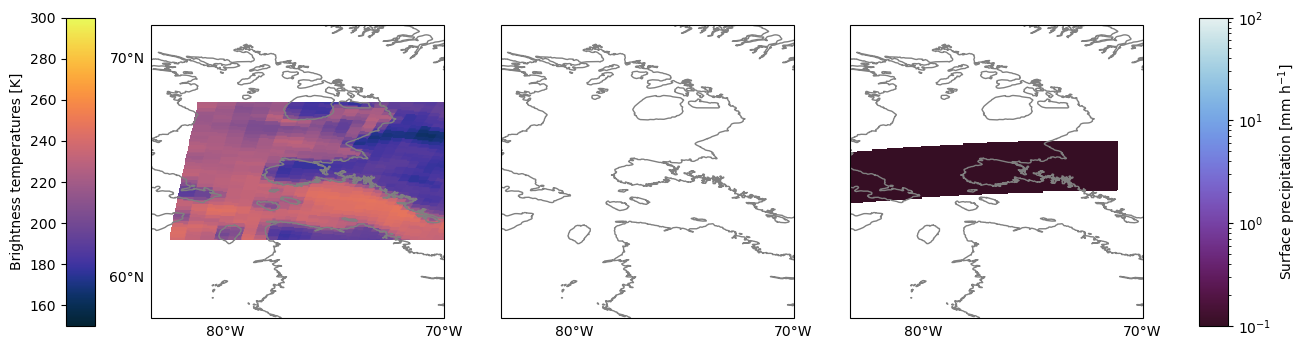

In [3]:
from pathlib import Path
ind = 18 
files = sorted(list(Path("/xdata/simon/speed/combined/mhs/native/").glob("*.nc")))
plot_collocations_native(files[ind])
files = sorted(list(Path("/xdata/simon/speed/combined/mhs/gridded/").glob("*.nc")))
plot_collocations_gridded(files[ind])
                             

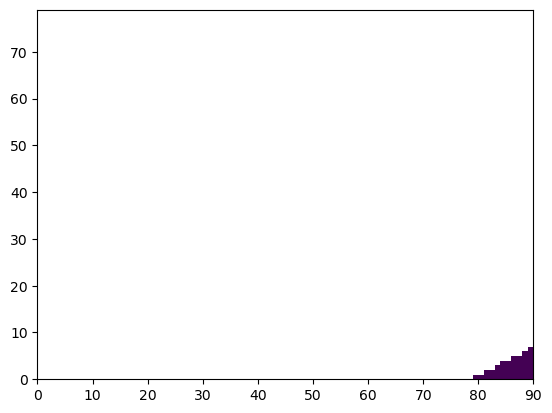

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
files = sorted(list(Path("/xdata/simon/speed/combined/mhs/native/").glob("*.nc")))
data_inpt = xr.load_dataset(files[ind], group="input_data")
data_ref = xr.load_dataset(files[ind], group="reference_data")
plt.pcolormesh(data_ref.surface_precip.data)

In [11]:
data_ref.surface_precip.data.shape

(79, 90)

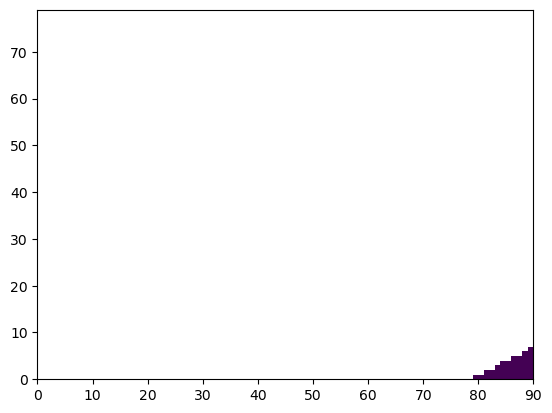

In [10]:

plt.pcolormesh(data_ref.surface_precip.data)

In [155]:
from pansat.products.satellite.gpm import l1c_metopa_mhs, l2b_gpm_cmb
from pansat.environment import get_index
from pansat import TimeRange
from speed.data.mrms import mrms_data

time_range = TimeRange("2019-01-01T16:31:00", "2019-01-01T16:31:00")
index = get_index(l1c_metopa_mhs)

granules = index.find(time_range=time_range)

In [159]:
index.search_interactive()

In [168]:
time_range = TimeRange("2019-01-01T16:20:00", "2019-01-01T16:40:00")
mhs_index = get_index(l1c_metopa_mhs).subset(time_range=time_range)
mrms_index = get_index(mrms_data.pansat_product).subset(time_range=time_range)

In [194]:
matches = find_matches(mhs_index, mrms_index)

1 1 1
1 1 1


In [197]:
matches[0][0].geometry

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [179]:
from pansat.catalog.index import find_matches
matches = find_matches(mhs_index, mrms_index)
matches[3][0].geometry

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [183]:
from pansat.catalog.index import find_matches
matches = find_matches(mhs_index, mrms_index)
matches[2][0].geometry

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [4]:
from pathlib import Path
import numpy as np
from speed.plotting import (
    plot_collocations_native,
    plot_collocations_gridded
)
                             

array([<Axes: ylabel='Brightness temperatures [K]'>, <GeoAxes: >,
       <GeoAxes: >, <GeoAxes: >,
       <Axes: ylabel='Surface precipitation [mm h$^{-1}$]'>], dtype=object)

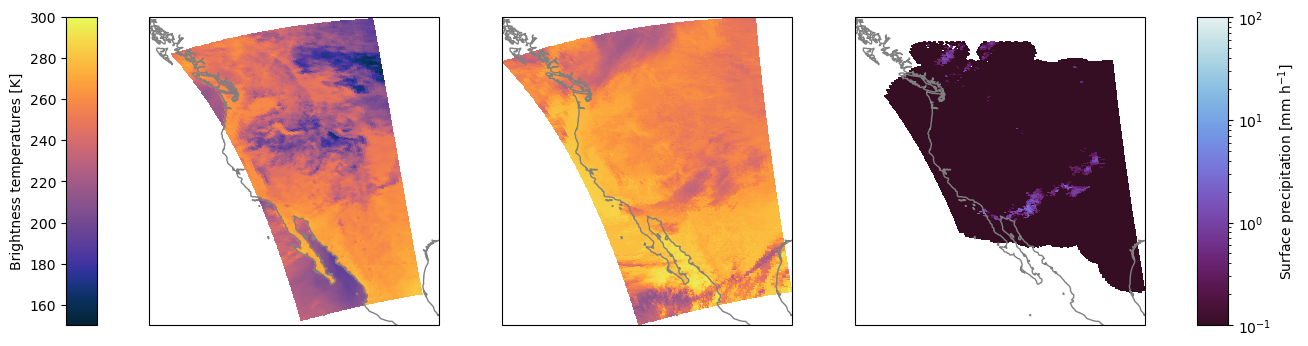

In [12]:
from pathlib import Path
files = sorted(list(Path("/xdata/simon/speed/mrms/mhs/native/").glob("*.nc")))
plot_collocations_native(files[2])
#plot_collocations_native(files[1])
#files = sorted(list(Path("/xdata/simon/speed/mrms/mhs/gridded/").glob("*.nc")))
#plot_collocations_gridded(files[5])
                             

In [119]:
import xarray as xr
files = sorted(list(Path("/xdata/simon/speed/combined/mhs/native/").glob("*.nc")))
data = xr.load_dataset(files[6], group="reference_data")
data_inpt = xr.load_dataset(files[6], group="input_data")

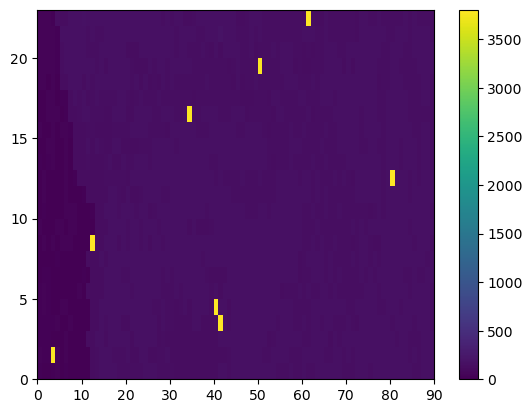

In [126]:
plt.pcolormesh(data.quality_flag_mirs[..., 2])
plt.colorbar()

In [103]:
import xarray as xr
data = xr.load_dataset(files[0], group="reference_data")
data.latitude

<xarray.DataArray 'latitude' (scans: 54, pixels: 90)>
array([[-70.5668, -70.568 , -70.5592, ..., -63.2974, -62.9996, -62.6749],
       [-70.4142, -70.4151, -70.4059, ..., -63.1785, -62.882 , -62.5587],
       [-70.2617, -70.2621, -70.2527, ..., -63.0593, -62.764 , -62.442 ],
       ...,
       [-62.7744, -62.7576, -62.7352, ..., -56.8184, -56.5757, -56.3105],
       [-62.6213, -62.6042, -62.5816, ..., -56.6844, -56.4427, -56.1784],
       [-62.4684, -62.451 , -62.4282, ..., -56.5503, -56.3095, -56.0463]],
      dtype=float32)
Coordinates:
    latitude   (scans, pixels) float32 -70.57 -70.57 -70.56 ... -56.31 -56.05
    longitude  (scans, pixels) float32 -26.07 -24.64 -23.32 ... 10.43 11.14
Dimensions without coordinates: scans, pixels

In [3]:
from speed.data.mrms import mrms_data
from speed.data.gpm import MHS_PRODUCTS

In [5]:
mhs = MHS_PRODUCTS[0]

In [7]:
from pansat.environment import get_index
index = get_index(mhs)
index

<Index of 'satellite.gpm.l1c_xcal2021v_metopa_mhs_v07a' containing 2584 entries>

In [14]:
from pansat import TimeRange
from pansat.granule import merge_granules
time_range = TimeRange("2019-01-01T00:00:00", "2019-01-02T01:00:00")
granules = merge_granules(index.find(time_range=time_range, roi=mrms_data.domain))

In [29]:
granules[9].geometry


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [31]:
granules[0].time_range

TimeRange(start='2019-01-01T00:39:31.159000', end='2019-01-01T00:56:19.158000')

## 

Error in callback <function _draw_all_if_interactive at 0x7f4769d00700> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

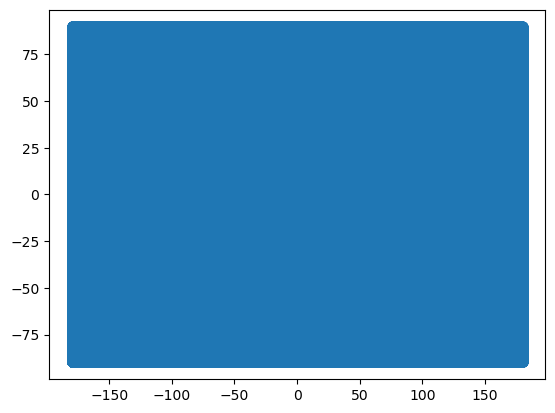

In [91]:
lats = ref_data.latitude.data
lons = ref_data.longitude.data
lons, lats = np.meshgrid(lons, lats)
plt.scatter(lons.ravel(), lats.ravel())


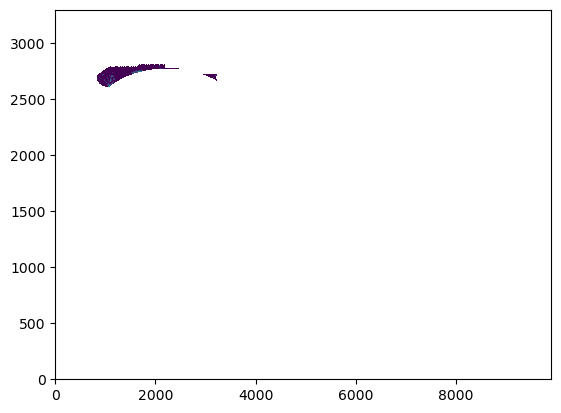

In [92]:
plt.pcolormesh(ref_data.surface_precip_mirs.data)

In [69]:
from pansat import TimeRange
from pansat.catalog import Index
from pansat.catalog.index import find_matches
from speed.data.gpm import mhs
from speed.data.combined import gpm_cmb

prod = mhs.products[0]
time_range = TimeRange("2019-01-01T00:00:00", "2019-01-02T00:00:00")
recs_mhs = prod.get(time_range)
gpm_index = Index.index(prod, [recs_mhs[0]])
recs_cmb = gpm_cmb.pansat_product.get(time_range=recs_mhs[0].temporal_coverage)
cmb_index = Index.index(gpm_cmb.pansat_product, [recs_cmb[0]])
matches = find_matches(gpm_index, cmb_index)

In [74]:
matches[0][0].geometry

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [79]:
list(matches[0][1])[0].geometry

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [86]:

matches[0][1]

{Granule(filename='2B.GPM.DPRGMI.CORRA2022.20181231-S224214-E001446.027509.V07A.HDF5', start_time='2018-12-31 22:42:14.571000', end_time='2018-12-31 22:47:22.571000', primary_index_name='matched_scans', primary_index_range='(0, 441)', secondary_index_name='matched_pixels', secondary_index_range='(0, 49)')}

In [113]:
res = gpm_cmb.load_reference_data(matches[0][0], list(matches[0][1])[0])

ORBIT PATH :: /tmp/tmp9q55ep0t/input /tmp/tmp9q55ep0t/input
|----------------------------------------|
|                                        |
|      M I R S    T E S T B E D          |
|                                        |
|----------------------------------------|
|      General Information:              |
|----------------------------------------|
Script currently running: /tmp/tmp9q55ep0t/scripts/gpm_scs_orbit.bash
LogFile		   =/tmp/tmp9q55ep0t/logs/gpm_orbit_logFile
processingMode           =0
iSensor_ID               =10
outFMaccur               =0
prefixFMaccur            =QCcheck
nprofs2retr              =1000000
nprofs2fwd               =1000000
iAddDeviceNoise          =0
MonitorIterat            =0
nAttempts                =2
extBkgAtmUse             =1
ExternDataAvailab        =0
PrintMonitor             =0
iPrintMonitor_fwd        =0
GeogrLimits              =0
minLat                   =-90.
maxLat                   =90.
minLon                   =-180.
maxLon      

In [91]:
res = Out[90]

In [97]:
import numpy as np
np.isfinite(res.surface_precip_combined.data).sum()

176802

In [99]:
mhs_data = matches[0][0].open()
mhs_data

<xarray.Dataset>
Dimensions:               (scans: 127, pixels: 90, channels: 5)
Coordinates:
  * scans                 (scans) int64 0 1 2 3 4 5 ... 121 122 123 124 125 126
  * pixels                (pixels) int64 0 1 2 3 4 5 6 ... 83 84 85 86 87 88 89
  * channels              (channels) int64 0 1 2 3 4
    latitude              (scans, pixels) float32 -70.57 -70.57 ... -45.93
    longitude             (scans, pixels) float32 -26.07 -24.64 ... 1.232 1.842
    scan_time             (scans) datetime64[ns] 2018-12-31T22:35:47.171000 ....
Data variables:
    tbs                   (scans, pixels, channels) float32 206.2 ... 263.5
    incidence_angle       (scans, pixels) float32 -59.35 -57.77 ... 57.69 59.28
    spacecraft_latitude   (scans) float32 -68.42 -68.28 -68.13 ... -49.71 -49.56
    spacecraft_longitude  (scans) float32 1.818 1.635 1.455 ... -11.71 -11.77
    spacecraft_altitude   (scans) float32 846.3 846.3 846.2 ... 839.6 839.5
Attributes: (12/20)
    DOI:                   10.5067/GPM/MHS/METOPA/1C/07
    DOIauthority:          http://dx.doi.org/
    DOIshortName:          1CMETOPAMHS
    AlgorithmID:           1CMHS
    AlgorithmVersion:      2021-V
    FileName:              1C.METOPA.MHS.XCAL2021-V.20181231-S223008-E001128....
    ...                    ...
    GranuleStart:          SOUTHERNMOST_LATITUDE
    TimeInterval:          ORBIT
    ProcessingSystem:      PPS
    ProductVersion:        V07A
    EmptyGranule:          NOT_EMPTY
    MissingData:           0

In [114]:
data_r = res.interp(latitude=mhs_data.latitude, longitude=mhs_data.longitude)

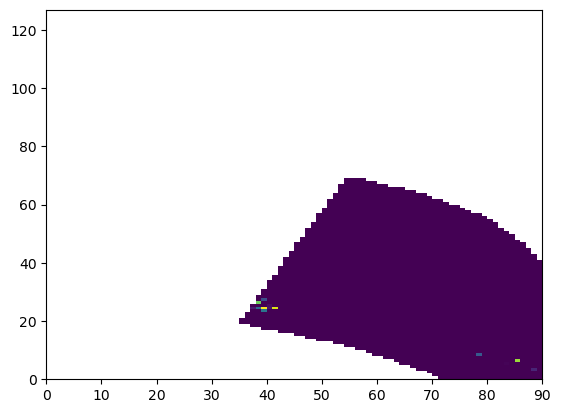

In [115]:
plt.pcolormesh(data_r.surface_precip_combined)

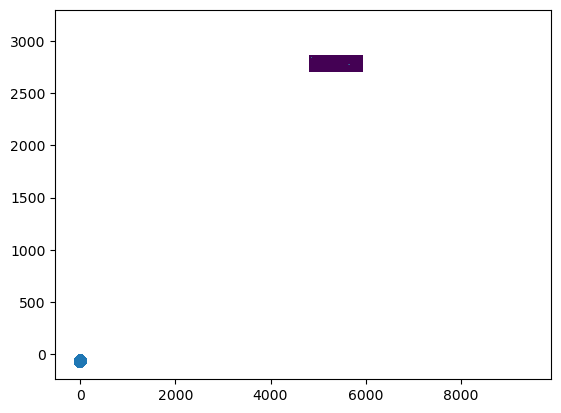

In [111]:
plt.pcolormesh(res.longitude, res.latitude, res.surface_precip_combined)
plt.scatter(mhs_data.longitude, mhs_data.latitude)